In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from matplotlib.colors import LogNorm

sns.set(context='paper', 
        style='ticks', 
        font_scale=1,
        font='serif',)

In [95]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

We first need to read the values from the PHOIBLE database. Values contains information about phonemes, and languages contains detailed information about languages. In order for this to work, you need to put these two datasets in a data folder. 

In [96]:
values = pd.read_csv('data/values.csv')
languages = pd.read_csv('data/languages.csv')

Percentage of the marginal phonemes: 

In [97]:
values[values['Marginal'] == True].shape[0] / values.shape[0] * 100

1.2714998198471545

In [98]:
values.head(10)

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
0,1,kore1280,72FB536ACFF408163656BBCDAFCAC6F6,a,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,a,1
1,2,kore1280,2F272C9C5FA2DA70706B565B2DC46DE8,aː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,aː,1
2,3,kore1280,B6D180EA250E6FBDE82C3D1F1BB4A39C,æ,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɛ æ,1
3,4,kore1280,CB37024CEAE9409F30FC756C0578E93C,æː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,æː,1
4,5,kore1280,199408E3D0668F10F475143F0E8CC0CB,e,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,e,1
5,6,kore1280,6DD56E3A80E90C3B1F5AC7AC45CE8180,eː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,eː,1
6,7,kore1280,80E0B47CF9A1F002B35B6AAB49574C61,ɤ,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɤ,1
7,8,kore1280,5C19A8FEDB2B0124AA7C66E689586A64,ɤː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɤː,1
8,9,kore1280,E7FBD92350B3CA8B7B5D77E36A607068,h,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ç h ɦ,1
9,10,kore1280,F0585BB57111C322D6E7DABB0D01F9EA,i,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,i,1


In [99]:
languages.head(10)

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
0,kore1280,Korean,Eurasia,37.500000,128.00000,kore1280,kor,kore1284,Koreanic
1,kett1243,Ket,Eurasia,63.755100,87.54660,kett1243,ket,yeni1252,Yeniseian
2,lakk1252,Lak,Eurasia,42.132800,47.08090,lakk1252,lbe,nakh1245,Nakh-Daghestanian
3,kaba1278,Kabardian,Eurasia,43.508200,43.39180,kaba1278,kbd,abkh1242,Abkhaz-Adyge
4,nucl1302,Georgian,Eurasia,41.850397,43.78613,nucl1302,kat,kart1248,Kartvelian
5,buru1296,Burushaski,Eurasia,36.216100,74.82360,buru1296,bsk,NaN,NaN
6,kuru1302,Kurukh,Eurasia,24.464400,86.46570,kuru1302,kru,drav1251,Dravidian
7,telu1262,Telugu,Eurasia,16.452900,78.70240,telu1262,tel,drav1251,Dravidian
8,kota1263,Kota (India),Eurasia,11.497800,76.93870,kota1263,kfe,drav1251,Dravidian
9,mund1320,Mundari,Eurasia,25.039100,87.17920,mund1320,unr,aust1305,Austroasiatic


In the values df, Language_ID corresponds to one language, but it's the Contribution_ID that we're after -- it indicates one unique set of phonemes per language:

In [100]:
values['Language_ID'].nunique()

2186

In [101]:
values['Contribution_ID'].nunique()

3020

In [102]:
3020 / 2186

1.3815187557182067

Now let's build a list of families with the corresponding amount of languages:

In [103]:
# count families by n of languages
n_langs = languages.groupby('Family_Name').size()
# sort by n of languages
n_langs = n_langs.sort_values(ascending=False)
# remove families the are less than 4 languages
n_langs = n_langs[n_langs > 3]

print(n_langs.index, n_langs.shape)

Index(['Atlantic-Congo', 'Pama-Nyungan', 'Indo-European', 'Austronesian',
       'Afro-Asiatic', 'Sino-Tibetan', 'Tupian', 'Mande', 'Arawakan',
       'Austroasiatic', 'Dravidian', 'Uralic', 'Nuclear Trans New Guinea',
       'Nilotic', 'Pano-Tacanan', 'Cariban', 'Quechuan', 'Central Sudanic',
       'Turkic', 'Nuclear-Macro-Je', 'Tucanoan', 'Tai-Kadai', 'Otomanguean',
       'Uto-Aztecan', 'Gunwinyguan', 'Nakh-Daghestanian', 'Mayan', 'Mongolic',
       'Salishan', 'Chibchan', 'Nyulnyulan', 'Ta-Ne-Omotic',
       'Athabaskan-Eyak-Tlingit', 'Bookkeeping', 'Mirndi', 'Worrorran',
       'Kadugli-Krongo', 'Sepik', 'Heibanic', 'Nuclear Torricelli', 'Chocoan',
       'Ijoid', 'Mixe-Zoque', 'Algic', 'Western Daly', 'Nambiquaran',
       'Narrow Talodi', 'Iwaidjan Proper', 'Arawan', 'Tungusic',
       'Kiowa-Tanoan', 'Guaicuruan', 'Surmic', 'Eskimo-Aleut', 'Nadahup',
       'Mangarrayi-Maran', 'Maningrida', 'Matacoan', 'Kartvelian', 'Iroquoian',
       'Muskogean', 'Zaparoan', 'Huitotoan', 'So

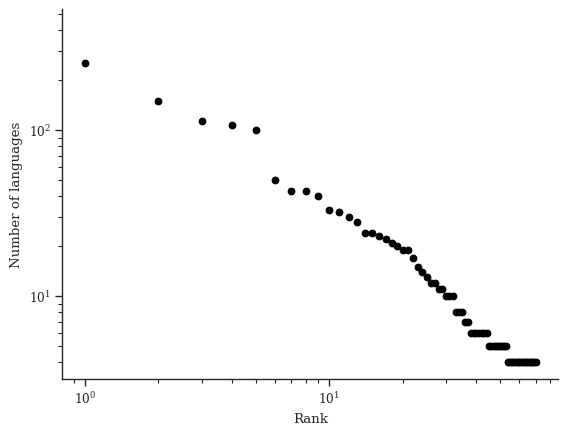

In [104]:
plt.scatter(range(len(n_langs.values)), n_langs.values, color='black')
sns.despine()
plt.xlabel('Rank')
plt.ylabel('Number of languages')
plt.xscale('log')
plt.yscale('log')
plt.show()

Now let's write a function that will create a phoneme-language matrix for each family:

In [105]:
def phoneme_matrix(family_name, languages, values):
    '''
    Function for creating the phoneme matrix for a given family.
    '''

    # Filter languages by family name
    lgs = languages.loc[languages['Family_Name'] == family_name, 'ID'].values
    
    # Select one Contribution_ID per language (so that we do not include duplicate data)
    selected_contributions = values[values['Language_ID'].isin(lgs)]
    selected_contributions = selected_contributions.groupby('Language_ID')['Contribution_ID']
    # NB: this is important! I am randomly choosing one contribution per language if there are multiple.
    selected_contributions = selected_contributions.apply(lambda x: np.random.choice(x.unique())).values
    
    # Extract phonemes for selected contributions
    lang_phonemes = {c: values.loc[values['Contribution_ID'] == c, 'Value'].values for c in selected_contributions}
    
    # Collect all unique phonemes
    all_phonemes = set(phoneme for phonemes in lang_phonemes.values() for phoneme in phonemes)
    phoneme_index = {phoneme: i for i, phoneme in enumerate(all_phonemes)}
    
    # Create binary matrix using NumPy
    matrix = np.zeros((len(lang_phonemes), len(all_phonemes)), dtype=int)
    orig_order = list(lang_phonemes.keys())
    
    for i, lang in enumerate(orig_order):
        for phoneme in lang_phonemes[lang]:
            matrix[i, phoneme_index[phoneme]] = 1

    # match language to contribution_id from orig_order
    # lang_ids = 

    return matrix, phoneme_index

In [106]:
def sort_matrix(M, iter):
    '''
    Sorting matrix for the nestedness display.
    '''
    row_order = np.arange(M.shape[0])
    col_order = np.arange(M.shape[1])
    
    for _ in range(iter):
        # sort the matrix by the sum of each column 
        col_order = np.argsort(M.sum(axis=0))[::-1]
        M = M[:, col_order]
        
        # sort the matrix by the sum of each row
        row_order = np.argsort(M.sum(axis=1))[::-1]
        M = M[row_order, :]
    
    return M, row_order, col_order

Let's look at Kartvelian again:

In [107]:
p_n, p = phoneme_matrix('Kartvelian', languages, values)
m, r, c = sort_matrix(p_n, 1000)

In [108]:
ordered_phonemes = [list(p.keys())[i] for i in c]

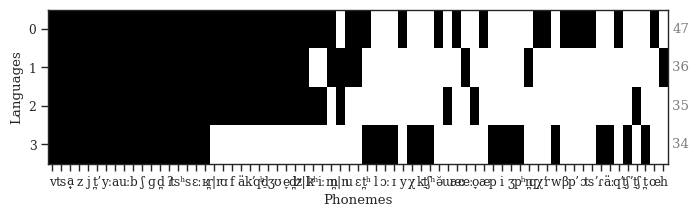

In [109]:
plt.figure(figsize=(8, 2))

plt.imshow(m, 
           cmap='binary', aspect='auto')

for i, row in enumerate(m):
    plt.text(m.shape[1], i, row.sum(), 
             va='center', color='grey')
    
# add ordered phonemes on the x axis
plt.xticks(np.arange(len(ordered_phonemes)), ordered_phonemes, rotation=0)

plt.xlabel('Phonemes')
plt.ylabel('Languages')

plt.show()

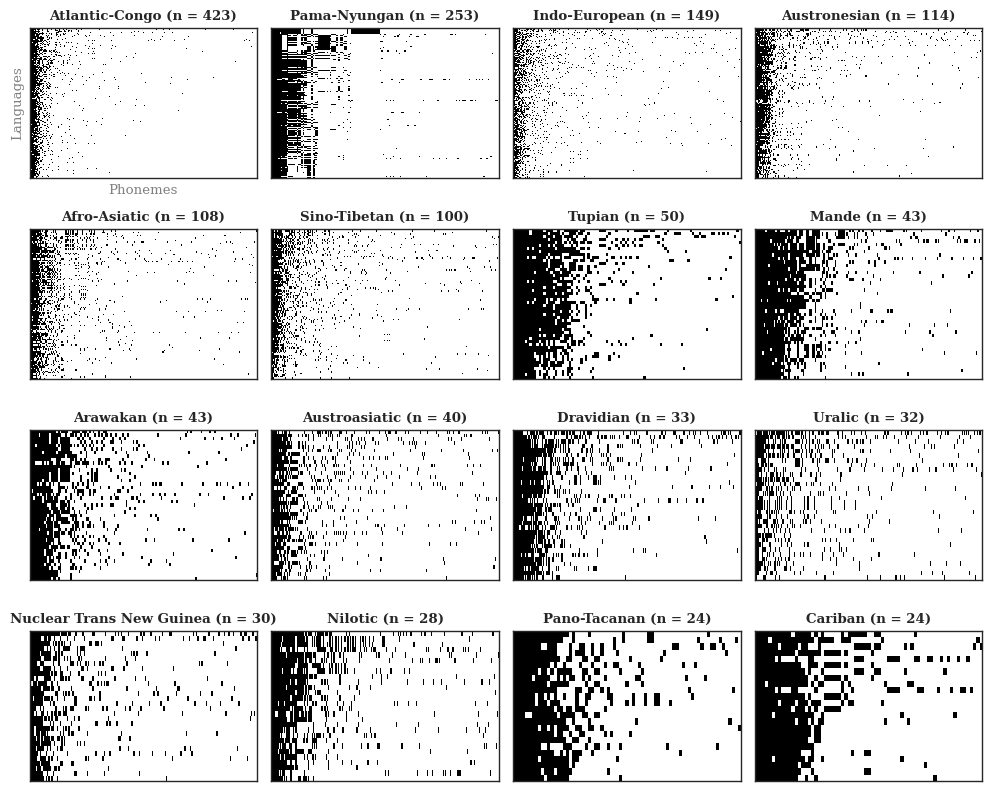

In [110]:
# plot matrices for the 12 biggest families
biggest_families = n_langs.head(16).index

fig, ax = plt.subplots(4, 4, figsize=(10, 8))

for i, family in enumerate(biggest_families):
    matrix, _ = phoneme_matrix(family, languages, values)
    matrix, _, _ = sort_matrix(matrix, 100)
    
    ax_ = ax[i//4, i%4]
    ax_.imshow(matrix, cmap='binary', 
               aspect='auto', 
               interpolation='none')
    ax_.set_title(f'{family} (n = {matrix.shape[0]})',
                  fontweight='bold')
    if i == 0:
        ax_.set_xlabel('Phonemes', color='gray')
        ax_.set_ylabel('Languages', color='gray')
    # remove x and y ticks
    ax_.set_xticks([])
    ax_.set_yticks([])

plt.tight_layout()
plt.show()

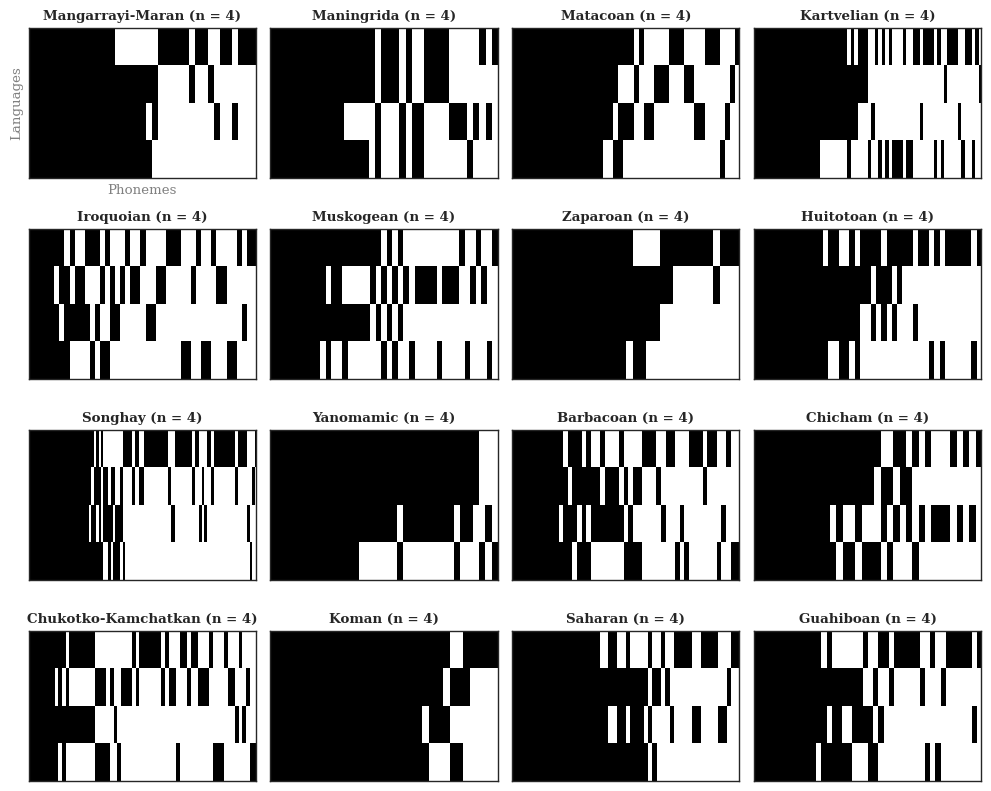

In [111]:
# plot matrices for the 16 smallest families
smallest_families = n_langs.tail(16).index

fig, ax = plt.subplots(4, 4, figsize=(10, 8))

for i, family in enumerate(smallest_families):
    matrix, _ = phoneme_matrix(family, languages, values)
    matrix, _, _ = sort_matrix(matrix, 100)
    
    ax_ = ax[i//4, i%4]
    ax_.imshow(matrix, cmap='binary', 
               aspect='auto', 
               interpolation='none')
    ax_.set_title(f'{family} (n = {matrix.shape[0]})',
                  fontweight='bold')
    if i == 0:
        ax_.set_xlabel('Phonemes', color='gray')
        ax_.set_ylabel('Languages', color='gray')
    # remove x and y ticks
    ax_.set_xticks([])
    ax_.set_yticks([])

plt.tight_layout()
plt.show()

In [112]:
# for every family, compute the gini coefficient of row sums and column sums after sorting

row_ginis = []
col_ginis = []
f_s = []

for f in n_langs.index:

    matrix, _ = phoneme_matrix(f, languages, values)
    matrix, _, _ = sort_matrix(matrix, 100)
    
    row_gini = gini(matrix.sum(axis=1)) # inventories
    col_gini = gini(matrix.sum(axis=0)) # phonemes

    row_ginis.append(row_gini)
    col_ginis.append(col_gini)

    # family size
    f_s.append(matrix.shape[0])

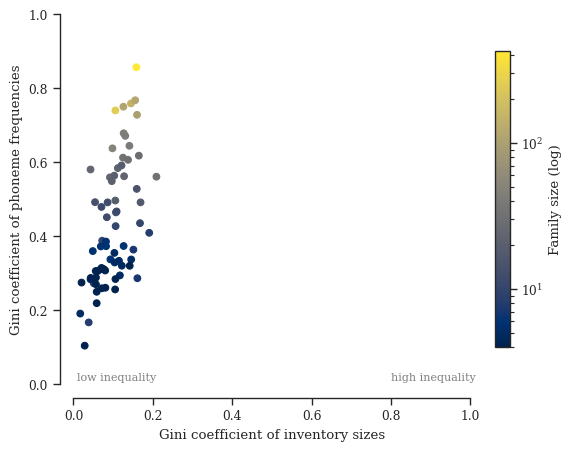

In [115]:
# plot matching gini coefficients
plt.scatter(row_ginis, col_ginis, c=f_s, cmap='cividis', norm=LogNorm())
plt.xlabel('Gini coefficient of inventory sizes')
plt.ylabel('Gini coefficient of phoneme frequencies')
plt.xlim(0, 1)
plt.ylim(0, 1)
sns.despine(offset=10, 
            trim=True)
plt.colorbar(label='Family size (log)',
             shrink=0.8)
# add text on the bottom "high inequality" vs "low inequality"
plt.text(0.01, 0.01, 'low inequality', 
         fontsize=8, color='gray')
plt.text(0.8, 0.01, 'high inequality',
            fontsize=8, color='gray')
plt.show()